<a href="https://colab.research.google.com/github/PrabhatKumar-Data/ExercisesML-DL/blob/master/Data_visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition 
from sklearn import datasets

%matplotlib inline

In [2]:
irisdata=datasets.load_iris()

In [4]:
targetnames=irisdata.target_names

targetnames

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
xdata=irisdata['data']

xdata[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y=irisdata.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
columns=irisdata.feature_names

columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#Using Principal component Analysis PCA to obtain 3 columns 
pca=decomposition.PCA(n_components=3)
pcs=pca.fit_transform(xdata)   #passed data as an array object
pcdf=pd.DataFrame(data=pcs,columns=['PC1','PC2','PC3'])

In [15]:
pcdf['target']=y

pcdf.head()

,PC1,PC2,PC3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


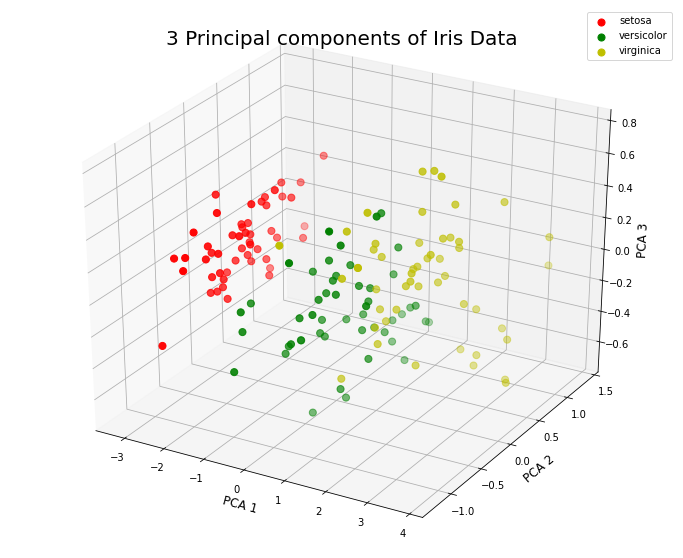

In [16]:
# plotting the 3d chart of iris data
fig=plt.figure(figsize=(12,10))
axes=fig.add_subplot(111, projection='3d')
axes.set_title('3 Principal components of Iris Data', fontsize = 20)
axes.set_xlabel('PCA 1', fontsize = 12)
axes.set_ylabel('PCA 2', fontsize = 12)
axes.set_zlabel('PCA 3', fontsize = 12)

colors = ['r', 'g', 'y']
targets=[0,1,2]

for target, color in zip(targets,colors):
    keep_indexes = pcdf['target'] == target
    axes.scatter(pcdf.loc[keep_indexes, 'PC1']
               , pcdf.loc[keep_indexes, 'PC2']
               , pcdf.loc[keep_indexes, 'PC3']
               , c = color
               , s = 50)
    
axes.legend(targetnames)
axes.grid()
plt.show()